Due to multipath effect, the channel state information (CSI) can be represented as follows:
$$H(f,t)=$$  equation(2)
where $p^s$ is the set of static paths whose length are fixed, $p^d$ is the set of dynamic paths whose lengths keep changing due to moving objects. As illustrated in Figure 2, for one dynamic transmission path $m\in{p^d}$, its length will change from $l_m(t_1)$ to $l_m(t_2)$. $a_n$ and $a_m$ are the attenuation of each path in $p_s$ and $p_d$ separately. $\xi(f)$ is the freqeuncy dependent absorption cross section coefficient (ACS) caused by the body signal absorption[11]. $\tau_m(t)$ is the propagation delay for path $m\in{p^d}$.

The Doppler frequency shift is contained in dynamic part of CSI. When a person walks, the length of path $m$ changes, the signal reflected by the moving human buddy via path $m\in{p^d}$ has doppler frequency shift:
$$f^D_m(t)=\frac{1}{\lambda}\frac{dl_m(t)}{dt}=f\frac{d\tau_m(t)}{dt}$$
Thus, $H_dynamic(f,t)$ can be rewritten as:

equation(4)


\begin{align*} 
|H(f,t)|^2 &=(H_s(f)+H_d(f,t))\times(H^*_s(f)+H^*_d(f,t))\\
           &=(|H_s(f)|+\sum_{k\in{p_d}}a_k(f,t)e^{-j\frac{2{\pi}d_k(t)}{\lambda}})\times(|H_s^*(f)|+\sum_{k\in{p_d}}a_k^*(f,t)e^{-j\frac{2{\pi}d_k(t)}{\lambda}}) \\
           &=|(H_s(f))|^2+H_s(f)\sum_{k\in{p_d}}a_k^*(f,t)e^{-j\frac{2{\pi}d_k(t)}{\lambda}}+H_s^*(f)\sum_{k\in{p_d}}a_k(f,t)e^{j\frac{2{\pi}d_k(t)}{\lambda}} \\
           & +\sum_{k,l\in{P_d}}(a_k(f,t)e^{-j\frac{2{\pi}d_k(t)}{\lambda}}\times{a_l(f,t)e^{j\frac{2{\pi}d_l(t)}{\lambda}}})\\
           &=|(H_s(f))|^2+\sum_{k\in{p_d}}\{H_s(f)a_k^*(f,t)e^{j\frac{2{\pi}d_k(t)}{\lambda}}+(H_s(f)a_k^*(f,t)e^{j\frac{2{\pi}d_k(t)}{\lambda}})^*\}\\
           &+\sum_{k,l\in{P_d}，l\ne{k}}\{a_k(f,t)e^{-j\frac{2{\pi}d_k(t)}{\lambda}}a_l^*(f,t)e^{j\frac{2{\pi}d_l(t)}{\lambda}}+(a_k(f,t)e^{-j\frac{2{\pi}d_k(t)}{\lambda}}a_l^*(f,t)e^{j\frac{2{\pi}d_l(t)}{\lambda}})^*\} \\
           &+\sum_{k,l\in{P_d}，l=k}a_k(f,t)e^{-j\frac{2{\pi}d_k(t)}{\lambda}}a_l^*(f,t)e^{j\frac{2{\pi}d_l(t)}{\lambda}}\\
           &=|H_s(f)|^2+\sum_{k\in{p_d}}|a_k(f,t)|^2+\sum_{k\in{p_d}}2|H_s(f)a_k(f,t)|cos(\frac{2\pi{d_k(t)}}{\lambda}+\phi_{sk})
+\sum_{k,l\in{p_d},l\ne{k}}2|a_k(f,t)a_l(f,t)|cos(\frac{2\pi{d_k(t)-d_l(t)}}{\lambda}+\phi_{kl})
\end{align*}


$$d_k(t)=d_k(0)+\Delta{d_k}\\
S=\sqrt{b^2+(a-vt_1)^2}\\
\frac{ds}{dt}=\frac{(a-vt_1)(-v)}{\sqrt{b^2+(a-vt_1)^2}}\\
\Delta{d_k}=ds\times{t}\\
d_k(t)=d_k(t_0)+\Delta{d_k}=d_k(t_0)+\frac{(a-vt_1)(-v)}{\sqrt{b^2+(a-vt_1)^2}}\times{t}$$


$$cos(\frac{2\pi{d_k(t)}}{\lambda}+\phi_{sk})=cos(\frac{2\pi({d_k(t_0)+\frac{(a-vt_1)(-v)}{\sqrt{b^2+(a-vt_1)^2}}\times{t}})}{\lambda}+\phi_{sk})$$



So the frequency is:
$$f^D_m=(t)\frac{(a-vt)(-v)}{\sqrt{b^2+(a-vt)^2}}/\lambda$$

<img src="environment.png">

frequency
$$f^D_m(t) = \frac{\frac{dD}{dt}}{\lambda}$$

Parallel 
$$
D=\sqrt{b^2+(a-vt)^2}+\sqrt{b^2+(c-vt)^2} \\
\frac{dD}{dt}=\frac{(a-vt)(-v)}{\sqrt{b^2+(a-vt)^2}}+\frac{(c-vt)(-v)}{\sqrt{b^2+(c-vt)^2}}\\
$$

perpendicular
$$
D=\sqrt{b^2+(a-vt_1)^2}\\
\frac{dD}{dt}=\frac{(a-vt_1)(-v)}{\sqrt{b^2+(a-vt_1)^2}}\\
$$

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
def parallel(wavelength, b, a, c, v):
    t_theory=np.linspace(-2, 9, 1000)
    ds=((a-v*t_theory)*(-v)/np.sqrt(b**2+(a-v*t_theory)**2))+((c-v*t_theory)*(-v)/np.sqrt(b**2+(c-v*t_theory)**2))
    f_theory=np.abs(ds/wavelength)
    return t_theory, f_theory

def perpendicular(wavelength, b, a, v):
    t_theory=np.linspace(0, 4.5, 1000)
    ds=(a-v*t_theory)*(-v)/np.sqrt((b**2/4)+(a-v*t_theory)**2)
    f_theory=np.abs(ds/wavelength)
    return t_theory, f_theory

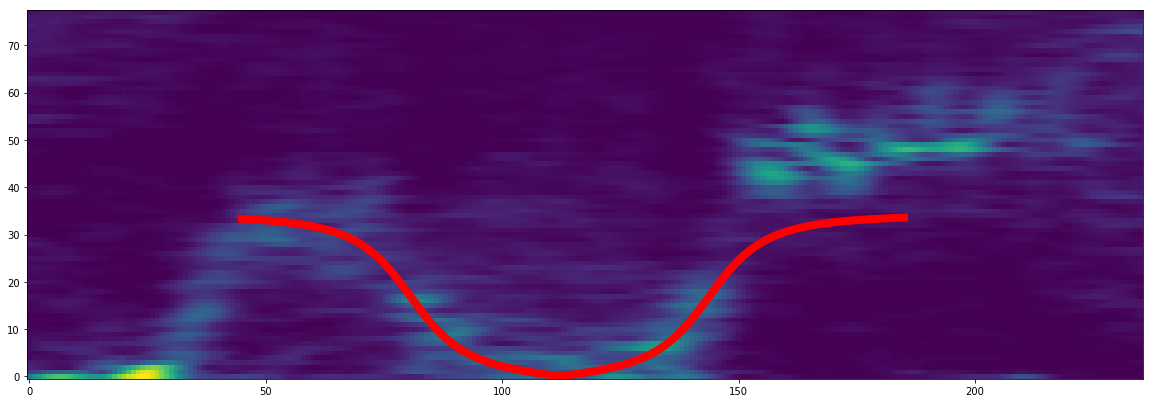

In [4]:
spectrogram = np.array(loadmat("champ_para2.mat")['x'])[2:]
plt.figure(figsize=(20, 22))
plt.imshow(spectrogram)
plt.gca().invert_yaxis()
plt.plot(np.linspace(45, 185, num=1000), parallel(0.058, 1, 5.76, 0.8, 1)[1], 'r', linewidth=8.0)

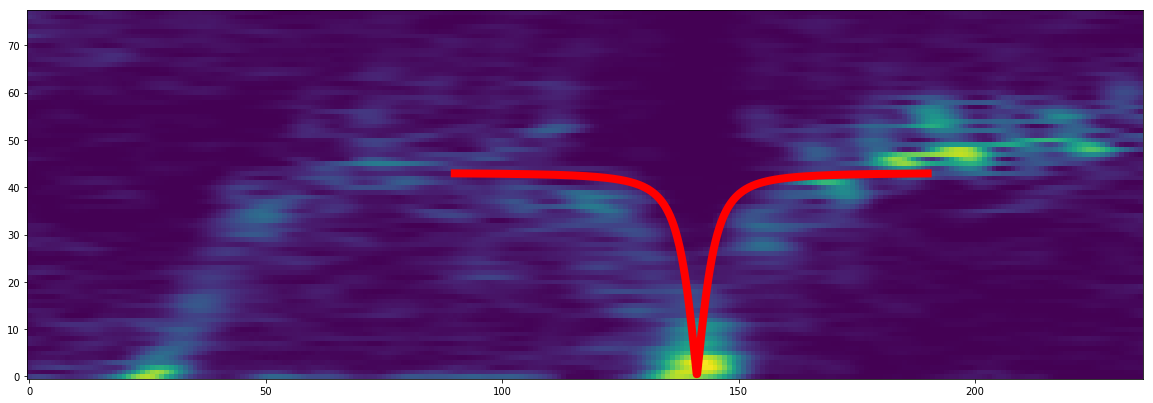

In [4]:
spectrogram = np.array(loadmat("champ_perp2.mat")['x'])[2:]
plt.figure(figsize=(20, 22))
plt.imshow(spectrogram)
plt.gca().invert_yaxis()
plt.plot(np.linspace(90, 190, num=1000), perpendicular(0.058, 1, 5.76, 2.5)[1], 'r', linewidth=8.0)

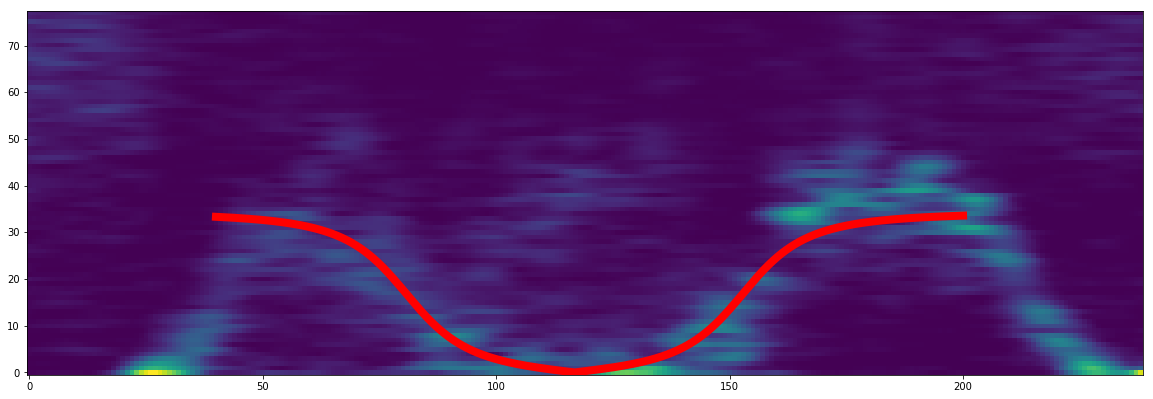

In [6]:
spectrogram = np.array(loadmat("champ_para1.mat")['x'])[2:]
plt.figure(figsize=(20, 22))
plt.imshow(spectrogram)
plt.gca().invert_yaxis()
plt.plot(np.linspace(40, 200, num=1000), parallel(0.058, 1, 5.76, 0.8, 1)[1], 'r', linewidth=8.0)

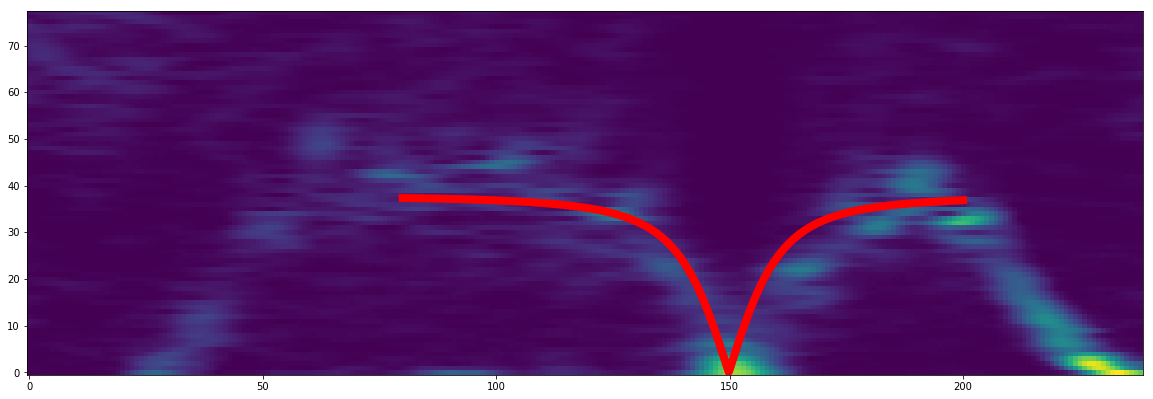

In [7]:
spectrogram = np.array(loadmat("champ_perp1.mat")['x'])[2:]
plt.figure(figsize=(20, 22))
plt.imshow(spectrogram)
plt.gca().invert_yaxis()
plt.plot(np.linspace(80, 200, num=1000), perpendicular(0.058, 1, 5.76, 2.2)[1], 'r', linewidth=8.0)

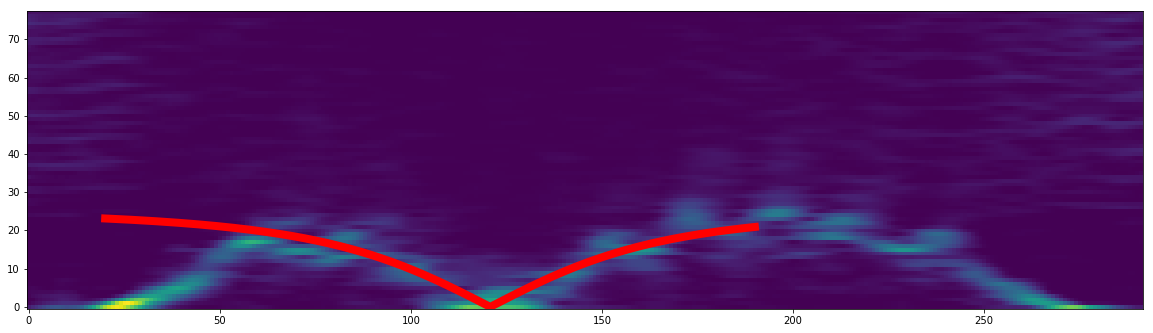

In [75]:
spectrogram = np.array(loadmat("ting_1_e.mat")['x'])[2:]
plt.figure(figsize=(20, 22))
plt.imshow(spectrogram)
plt.gca().invert_yaxis()
plt.plot(np.linspace(20, 190, num=1000), perpendicular(0.058, 2, 4, 1.5)[1], 'r', linewidth=8.0)

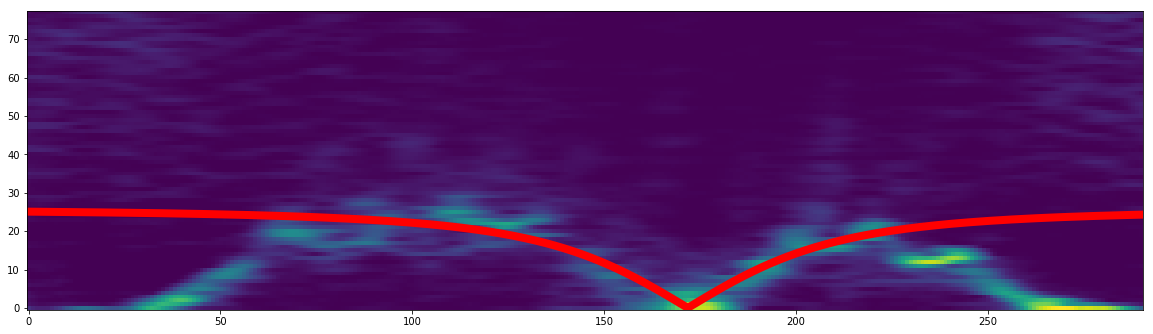

In [92]:
spectrogram = np.array(loadmat("ting_2_e.mat")['x'])[2:]
plt.figure(figsize=(20, 22))
plt.imshow(spectrogram)
plt.gca().invert_yaxis()
plt.plot(np.linspace(0, 290, num=1000), perpendicular(0.058, 1, 4, 1.5)[1], 'r', linewidth=8.0)